# TLE Data Processing, Filtering, and Plotting of Satellite Positions

This notebook will:
1. **Read TLE (Two-Line Element)** data.
2. **Filter out satellites with "DTC"** in their name (potentially decommissioned satellites).
3. **Convert satellite data into latitude, longitude, and altitude** using `pyorbital`.
4. **Plot the satellite positions** on a 2D scatter plot or on a spherical plane(Experimental feature).
---

## 1. Install Required Libraries

First, you need to install the `pyorbital` library if you haven't already.

In [55]:
!pip install pyorbital

In [56]:
# Import necessary libraries
from pyorbital.orbital import Orbital
from datetime import datetime, timezone

In [57]:
# Function to read TLE data from a file
def read_tle_file(file_name):
    with open(file_name, 'r') as tle_file:
        lines = tle_file.readlines()
    return lines

# Specify the path to your TLE file
file_name = r'C:\Users\danny\Downloads\starlinkTLEs.txt'  # Update this to the correct path

# Read the TLE file
tle_data = read_tle_file(file_name)

In [58]:
# Function to calculate lat, long, and altitude for a given TLE
def process_tle(tle_name, tle_line1, tle_line2):
    satellite = Orbital(tle_name, line1=tle_line1, line2=tle_line2)
    current_time = datetime.now(timezone.utc)
    lon, lat, alt = satellite.get_lonlatalt(current_time)
    return lat, lon, alt

# Example: Processing the first satellite in the TLE file
tle_name = tle_data[0].strip()   # Satellite name
tle_line1 = tle_data[1].strip()  # TLE line 1
tle_line2 = tle_data[2].strip()  # TLE line 2

# Get lat, long, and altitude
latitude, longitude, altitude = process_tle(tle_name, tle_line1, tle_line2)

In [59]:
import csv

# Function to process TLEs and remove satellites with 'DTC' in the name, then save results to CSV
def process_tles_filtered_to_csv(file_name, output_file_name):
    # Open the TLE file for reading
    tle_data = read_tle_file(file_name)
    
    # Prepare the output file to write results
    with open(output_file_name, 'w', newline='') as csvfile:
        fieldnames = ['Satellite', 'Latitude', 'Longitude', 'Altitude']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        
        writer.writeheader()  # Write CSV header
        
        # Process the TLEs (each TLE consists of 3 lines: name, line1, line2)
        for i in range(0, len(tle_data), 3):
            tle_name = tle_data[i].strip()          # Satellite name
            
            # Skip if the satellite name contains 'DTC'
            if 'DTC' in tle_name:
                continue
            
            tle_line1 = tle_data[i+1].strip()       # Line 1 of the TLE
            tle_line2 = tle_data[i+2].strip()       # Line 2 of the TLE
            
            # Get lat, long, and altitude
            lat, lon, alt = process_tle(tle_name, tle_line1, tle_line2)
            
            # Write the result to CSV
            writer.writerow({
                'Satellite': tle_name,
                'Latitude': f"{lat:.6f}",
                'Longitude': f"{lon:.6f}",
                'Altitude': f"{alt:.2f} km"
            })
    
    print(f"Results saved to {output_file_name}")

# Specify the TLE file and output CSV file
output_file_name = 'filtered_satellite_positions.csv'
process_tles_filtered_to_csv(file_name, output_file_name)


Results saved to filtered_satellite_positions.csv


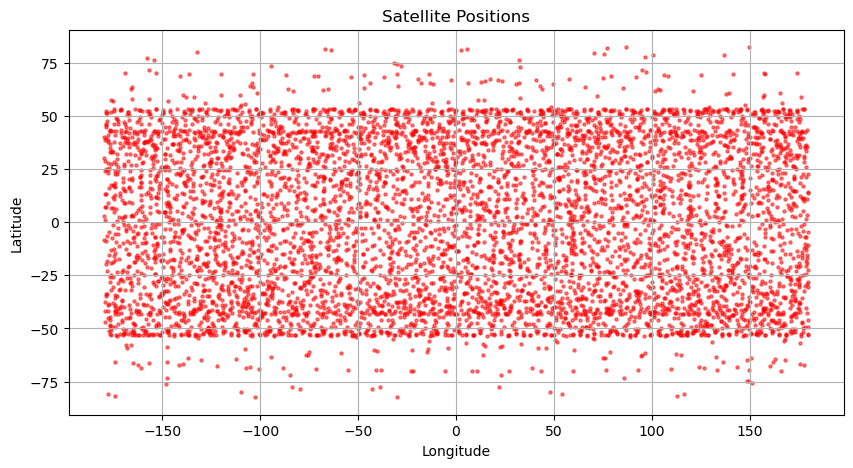

In [60]:
# Updated plot function to handle multiple satellites
import matplotlib.pyplot as plt

def plot_all_satellite_positions(satellite_data):
    plt.figure(figsize=(10, 5))
    
    # Plot each satellite's position
    for satellite in satellite_data:
        lat, lon = satellite['latitude'], satellite['longitude']
        plt.scatter(lon, lat, c='r', marker='o', s=5, alpha=0.5)  # Plot the satellite position
    
    plt.title('Satellite Positions')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

# Example of how satellite_data will look like
# [{'name': 'SAT1', 'latitude': 10.123, 'longitude': 20.123, 'altitude': 500},
#  {'name': 'SAT2', 'latitude': -15.456, 'longitude': 35.456, 'altitude': 600}]

# Assuming satellite_data is a list of dictionaries containing the satellite name, latitude, and longitude
def process_all_tles(tle_data):
    satellite_data = []
    
    # Process the TLEs (each TLE consists of 3 lines: name, line1, line2)
    for i in range(0, len(tle_data), 3):
        tle_name = tle_data[i].strip()          # Satellite name
        tle_line1 = tle_data[i+1].strip()       # Line 1 of the TLE
        tle_line2 = tle_data[i+2].strip()       # Line 2 of the TLE
        
        # Get lat, long, and altitude
        lat, lon, alt = process_tle(tle_name, tle_line1, tle_line2)
        
        # Add satellite data to the list
        satellite_data.append({'name': tle_name, 'latitude': lat, 'longitude': lon, 'altitude': alt})
    
    return satellite_data

# Process the TLE file to get satellite data
satellite_data = process_all_tles(tle_data)

# Plot all the satellite positions
plot_all_satellite_positions(satellite_data)


In [61]:
!pip install basemap

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def plot_satellite_positions_2d(satellite_data):
    plt.figure(figsize=(10, 7))
    
    # Create a Basemap instance
    m = Basemap(projection='moll', resolution='c', lat_0=0, lon_0=0)

    # Draw coastlines, map boundary, and countries
    m.drawcoastlines()
    m.drawcountries()
    m.drawmapboundary()

    # Plot satellite positions
    for satellite in satellite_data:
        lat, lon = satellite['latitude'], satellite['longitude']
        x, y = m(lon, lat)
        plt.scatter(x, y, c='r', marker='o', s=5, alpha=0.5)

    plt.title('Satellite Positions on 2D Projection')
    plt.show()

# Example call with your satellite data
plot_satellite_positions_2d(satellite_data)
